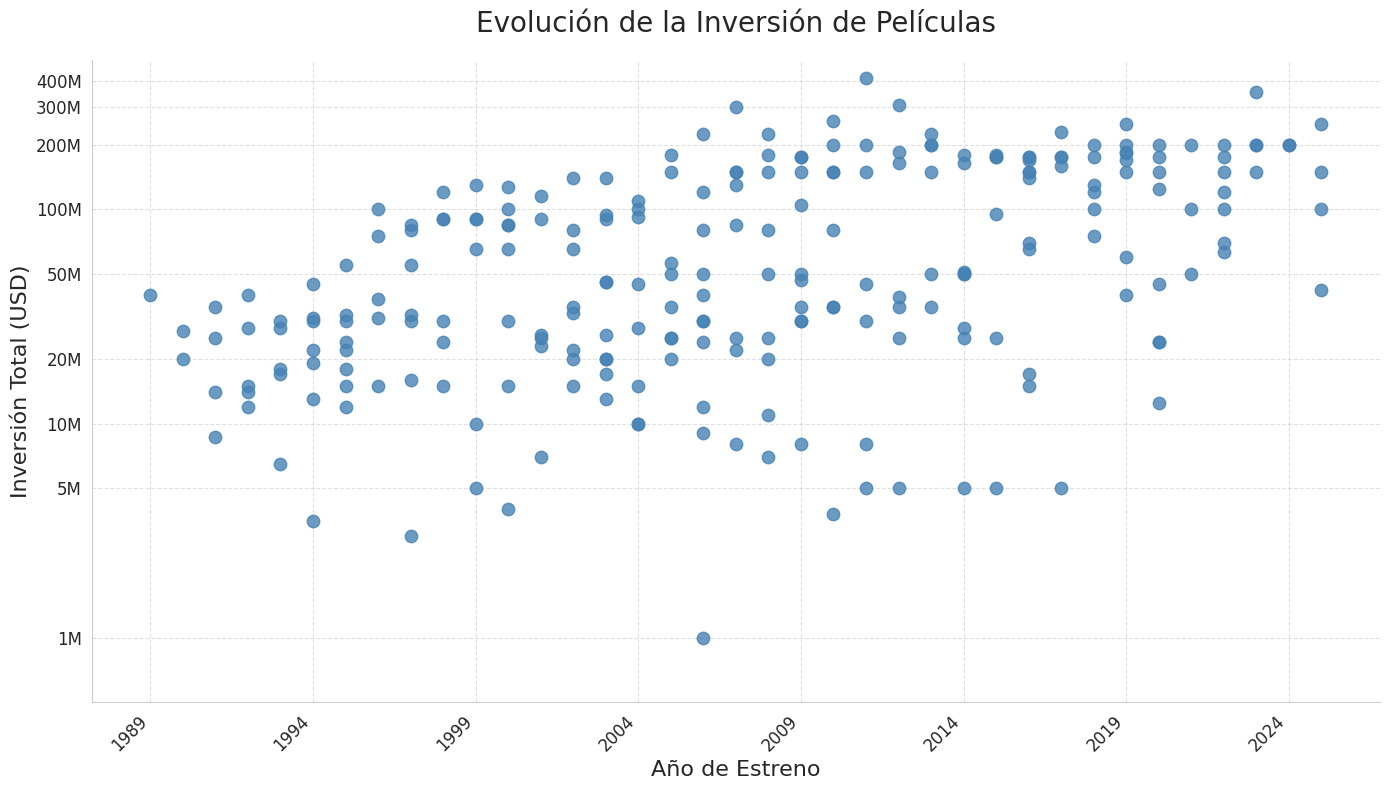

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter


file_name = 'Datos visualización.csv'
try:
    df = pd.read_csv(file_name, sep=';', encoding='latin-1')
except FileNotFoundError:
    print(f"Error: Asegúrate de que tu archivo se llama '{file_name}' y está subido a Google Colab.")
    exit()

df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('\r', '', regex=False)
INVERSION_COL_NAME = df.columns[3]
FECHA_COL_NAME = df.columns[2]


df['Inversión_Numerica'] = df[INVERSION_COL_NAME].astype(str).str.strip().str.replace('"', '', regex=False).str.replace('.', '', regex=False).str.replace(',', '', regex=False)
df['Inversión_Numerica'] = pd.to_numeric(df['Inversión_Numerica'], errors='coerce')
df['Año_Estreno'] = pd.to_numeric(df[FECHA_COL_NAME].astype(str).str.slice(0, 4), errors='coerce')


df_limpio = df.dropna(subset=['Año_Estreno', 'Inversión_Numerica']).copy()
df_limpio = df_limpio[df_limpio['Inversión_Numerica'] > 0]
df_limpio['Año_Estreno'] = df_limpio['Año_Estreno'].astype(int)


sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))


plt.scatter(
    x=df_limpio['Año_Estreno'],
    y=df_limpio['Inversión_Numerica'],
    s=80,
    color="#4682B4", 
    alpha=0.8
)

plt.yscale('log')



y_ticks_values = [
    1000000, 5000000, 10000000, 20000000, 50000000,
    100000000, 200000000, 300000000, 400000000
]


def smart_formatter(x, pos):
    """Muestra la etiqueta en notación 'M', 'K' o valor exacto."""
    if x >= 1000000:
        return f'{int(round(x/1000000))}M'
    elif x >= 1000:
        return f'{int(round(x/1000))}K'
    else:
        return f'{int(x)}'


plt.yticks(y_ticks_values, fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(smart_formatter))


plt.ylim(500000, 500000000)


plt.title('Evolución de la Inversión de Películas', fontsize=20, pad=20)
plt.xlabel('Año de Estreno', fontsize=16)
plt.ylabel('Inversión Total (USD)', fontsize=16)


min_year = df_limpio['Año_Estreno'].min()
max_year = df_limpio['Año_Estreno'].max()
plt.xticks(np.arange(min_year, max_year + 1, 5), rotation=45, ha='right', fontsize=12)

sns.despine()
plt.grid(axis='both', which='major', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()